<a href="https://colab.research.google.com/github/anjali-ojha/deep-learning/blob/main/assignment/assignment-2/Anjali_Ojha_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homwwork-2 - Pytorch

## Use the code provided in demo 02 to complete this assignment.

## Step 1. Follow along with the tutorial to gain an understanding of the process.

In [2]:
%matplotlib inline

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset

In [4]:
# Load Fashion MNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9704059/9704059 [00:00<00:00, 63708309.24it/s]


Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 12283999.16it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 77586325.64it/s]


Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 13617148.38it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


In [5]:
def show_data(data):
    labels_map = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data), size=(1,)).item()
        img, label = data[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

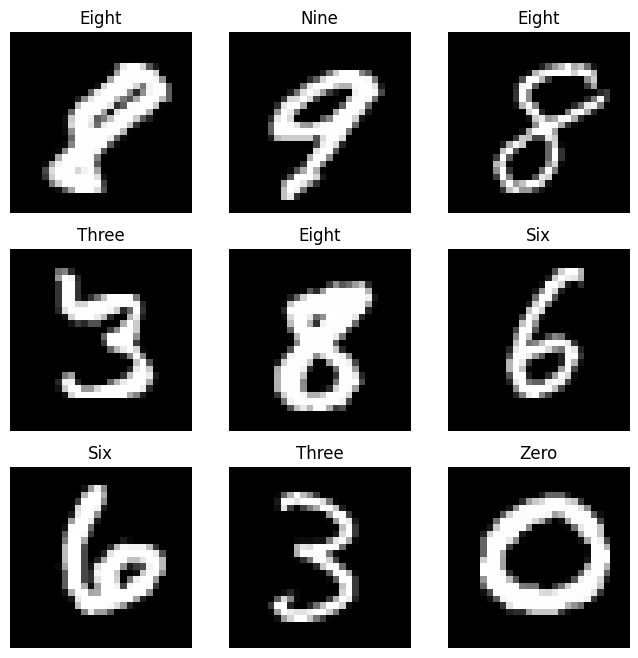

In [6]:
show_data(train_dataset)

In [17]:
def training(train_loader, num_epochs, model, criterion, optimizer, verbose=0):
    """
    Train the neural network
    """
    running_loss = 0.0
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            labels_onehot = nn.functional.one_hot(labels, num_classes=10).float()  # Convert labels to one-hot encoding

            loss = criterion(outputs, labels_onehot)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if verbose == 0 and i % 100 == 99:  # print every 100 mini-batches
                print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                running_loss = 0.0
        if verbose == 1:
            print(f'Epoch {epoch + 1}, Loss: {running_loss / 100}')

    print(f'Finished Training with loss = {running_loss / 100}')
    return model, running_loss/100

In [18]:
def evaluation(model, test_data):
    # Evaluate the model
    model.eval()
    predictions = []
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_data:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.numpy())  # Store predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy on test set: {correct / total * 100}%')
    return correct, total, predictions


In [19]:
def show_sample_result(model, images, labels):
    # Get one test image and its label
    image, label = images[1], labels[1]

    # Reshape the image tensor to a 28x28 shape
    image = image.view(28, 28)

    # Convert the image tensor to a numpy array for visualization
    image_numpy = image.numpy()

    # Show the image
    plt.imshow(image_numpy, cmap='gray')
    plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
    plt.axis('off')
    plt.show()


## Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

In [10]:
# Initialize the neural network
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = MLP()
model, _ = training(train_loader = train_loader,
                    num_epochs=5,
                    model=model,
                    criterion = nn.CrossEntropyLoss(),
                    optimizer = optim.Adam(model.parameters(), lr=0.001))
correct, total, predictions = evaluation(model=model, test_data=test_loader)
# show_sample_result(model=model, )

Epoch 1, Batch 100, Loss: 1.0403295677900315
Epoch 1, Batch 200, Loss: 0.4514515769481659
Epoch 1, Batch 300, Loss: 0.3887970148026943
Epoch 1, Batch 400, Loss: 0.35856480166316035
Epoch 1, Batch 500, Loss: 0.3227876826375723
Epoch 1, Batch 600, Loss: 0.28552216179668904
Epoch 1, Batch 700, Loss: 0.2731552179902792
Epoch 1, Batch 800, Loss: 0.2573801130801439
Epoch 1, Batch 900, Loss: 0.2621749038994312
Epoch 2, Batch 100, Loss: 0.2232590626180172
Epoch 2, Batch 200, Loss: 0.2011128705739975
Epoch 2, Batch 300, Loss: 0.20308306265622378
Epoch 2, Batch 400, Loss: 0.18551764529198408
Epoch 2, Batch 500, Loss: 0.19707779645919798
Epoch 2, Batch 600, Loss: 0.20363991148769855
Epoch 2, Batch 700, Loss: 0.17986039992421865
Epoch 2, Batch 800, Loss: 0.1719306116178632
Epoch 2, Batch 900, Loss: 0.161939442679286
Epoch 3, Batch 100, Loss: 0.14251200761646032
Epoch 3, Batch 200, Loss: 0.15314252011477947
Epoch 3, Batch 300, Loss: 0.14296368904411794
Epoch 3, Batch 400, Loss: 0.1291934664361179
E

## Step 4. Choose one of the proposed modifications below:

### 1 - Add another Dense layer of 128 nodes

In [ ]:
#Define the neural network architecture
class MLP_New_Layer(nn.Module):
    def __init__(self):
        super(MLP_New_Layer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the neural network
model_new_layer = MLP_New_Layer()

model_new_layer, _ = training(num_epochs=5,
                              model=model_new_layer,
                              criterion = nn.CrossEntropyLoss(),
                              optimizer = optim.Adam(model_new_layer.parameters(), lr=0.001))

correct_new_layer, total_new_layer, predictions_new_layer = evaluation(model=model_new_layer, test_data=test_loader)

### Increase the current number of nodes in the layer to 256

In [ ]:
#Define the neural network architecture
class MLP_Wide_Layer(nn.Module):
    def __init__(self):
        super(MLP_Wide_Layer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model_wide_layer = MLP_Wide_Layer()
model_wide_layer, _ = training(num_epochs = 5,
                                model = model_wide_layer,
                                criterion = nn.CrossEntropyLoss(),
                                optimizer = optim.Adam(model_wide_layer.parameters(), lr=0.001))


correct_wide_layer, total_wide_layer, predictions_wide_layer = evaluation(model=model_wide_layer, test_data=test_loader)

## Step 6. Report on the results of the modified model and if it matches your hypothesis

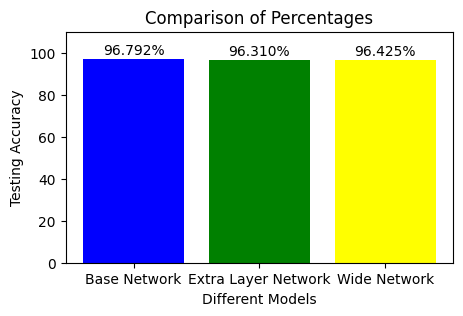

In [13]:
import matplotlib.pyplot as plt

# Define the percentages
base_accuracy = correct / total * 100
new_layer_accuracy = correct_new_layer / total * 100
wide_accuracy = correct_wide_layer / total * 100

# Define the labels for the bars
labels = ['Base Network', 'Extra Layer Network', 'Wide Network']

# Define the values for the bars
values = [base_accuracy, new_layer_accuracy, wide_accuracy]

# Create the bar chart
plt.figure(figsize=(5, 3))
bars = plt.bar(labels, values, color=['blue', 'green', 'yellow'])

# Add percentage values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.3f}%', ha='center', va='bottom')

plt.ylim(0, 110)
# Add title and labels
plt.title('Comparison of Percentages')
plt.xlabel('Different Models')
plt.ylabel('Testing Accuracy')

# Show the plot
plt.show()

## Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [14]:
#Define the neural network architecture
class MLP_Flex(nn.Module):
    def __init__(self, activation_function, dropout):
        super(MLP_Flex, self).__init__()
        self.activation_function = activation_function
        self.dropout = dropout
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout_fuction = nn.Dropout(p=dropout)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation_function(self.fc1(x))
        x = self.dropout_fuction(x)
        x = self.activation_function(self.fc2(x))
        x = self.dropout_fuction(x)
        x = self.fc3(x)
        return x


In [21]:
optimizers = [optim.Adam, optim.SGD, optim.RMSprop]
loss_functions = [nn.MSELoss(), nn.CrossEntropyLoss(), ]
dropouts = [0.0, 0.2, 0.5]
activation_functions = [nn.ReLU(), nn.Sigmoid()]

result = {"optimizer":[], "loss_function": [], "dropout":[],
          "activation_function": [],
          "training_loss": [], "test_accuracy": [], "name": []}

for optimizer in optimizers:
    for loss_function in loss_functions:
        for dropout in dropouts:
            for activation_function in activation_functions:

                result["optimizer"].append(optimizer.__name__)
                result["loss_function"].append(loss_function.__class__.__name__)
                result["activation_function"].append(activation_function.__class__.__name__)
                result["dropout"].append(dropout)

                name = []
                for key in ["optimizer", "loss_function", "activation_function", "dropout"]:
                    name.append(f'{key}={result[key][-1]}')

                result["name"].append(",".join(name))

                print(f'''\n\tTraining {result["name"][-1]}\n''')

                model = MLP_Flex(activation_function=activation_function, dropout=dropout)
                model, training_loss = training(num_epochs = 5,
                                                model = model,
                                                criterion = loss_function,
                                                optimizer = optimizer(model.parameters(), lr=0.001),
                                                verbose = False)
                correct, total, predictions = evaluation(model=model, test_data=test_loader)

                result["training_loss"].append(training_loss)
                result["test_accuracy"].append(correct/total*100)

                print('\n')

import pandas as pd
result_df = pd.DataFrame(result)
result_df


	Training optimizer=Adam,loss_function=MSELoss,activation_function=ReLU,dropout=0.0

Epoch 1, Loss: 0.18697951362933962
Epoch 2, Loss: 0.09308258606120944
Epoch 3, Loss: 0.07442031439160929
Epoch 4, Loss: 0.06530307362554595
Epoch 5, Loss: 0.059944613045081495
Finished Training
Accuracy on test set: 96.55333333333334%



	Training optimizer=Adam,loss_function=MSELoss,activation_function=Sigmoid,dropout=0.0

Epoch 1, Loss: 0.31904714109376076
Epoch 2, Loss: 0.13636679910123348
Epoch 3, Loss: 0.11085610748268664
Epoch 4, Loss: 0.0957721091923304
Epoch 5, Loss: 0.08517300349427387
Finished Training
Accuracy on test set: 95.61833333333334%



	Training optimizer=Adam,loss_function=MSELoss,activation_function=ReLU,dropout=0.2

Epoch 1, Loss: 0.29067599336616695
Epoch 2, Loss: 0.18790761347860097
Epoch 3, Loss: 0.1692900667525828
Epoch 4, Loss: 0.16084475022740663
Epoch 5, Loss: 0.15416608817875385
Finished Training
Accuracy on test set: 95.1%



	Training optimizer=Adam,loss_function=MSELo

,optimizer,loss_function,dropout,activation_function,training_loss,test_accuracy,name
0,Adam,MSELoss,0.0,ReLU,0.059945,96.553333,"optimizer=Adam,loss_function=MSELoss,activatio..."
1,Adam,MSELoss,0.0,Sigmoid,0.085173,95.618333,"optimizer=Adam,loss_function=MSELoss,activatio..."
2,Adam,MSELoss,0.2,ReLU,0.154166,95.100000,"optimizer=Adam,loss_function=MSELoss,activatio..."
3,Adam,MSELoss,0.2,Sigmoid,0.121905,95.085000,"optimizer=Adam,loss_function=MSELoss,activatio..."
4,Adam,MSELoss,0.5,ReLU,0.416381,90.280000,"optimizer=Adam,loss_function=MSELoss,activatio..."
5,Adam,MSELoss,0.5,Sigmoid,0.244896,93.110000,"optimizer=Adam,loss_function=MSELoss,activatio..."
6,Adam,CrossEntropyLoss,0.0,ReLU,0.901877,96.526667,"optimizer=Adam,loss_function=CrossEntropyLoss,..."
7,Adam,CrossEntropyLoss,0.0,Sigmoid,0.899054,96.561667,"optimizer=Adam,loss_function=CrossEntropyLoss,..."
8,Adam,CrossEntropyLoss,0.2,ReLU,1.573557,95.705000,"optimizer=Adam,loss_function=CrossEntropyLoss,..."
9,Adam,CrossEntropyLoss,0.2,Sigmoid,1.664716,95.795000,"optimizer=Adam,loss_function=CrossEntropyLoss,..."


In [16]:
result_df

In [31]:
optimizers = [optim.Adam, optim.SGD, optim.RMSprop]
loss_functions = [nn.MSELoss(), nn.CrossEntropyLoss(), ]
dropouts = [0.0, 0.1, 0.2]
activation_functions = [nn.ReLU(), nn.Sigmoid()]

result = {"optimizer":[], "loss_function": [], "dropout":[],
          "activation_function": [],
          "training_loss": [], "test_accuracy": [], "name": []}


def train_and_evaluate(optimizer, loss_function, dropout, activation_function, train_loader, test_loader, result):
    result["optimizer"].append(optimizer.__name__)
    result["loss_function"].append(loss_function.__class__.__name__)
    result["activation_function"].append(activation_function.__class__.__name__)
    result["dropout"].append(dropout)

    name = []
    for key in ["optimizer", "loss_function", "activation_function", "dropout"]:
        name.append(f'{key}={result[key][-1]}')

    result["name"].append(",".join(name))

    print(f'''\n\tTraining {result["name"][-1]}\n''')

    model = MLP_Flex(activation_function=activation_function, dropout=dropout)
    model, training_loss = training(num_epochs = 5,
                                    model = model,
                                    criterion = loss_function,
                                    optimizer = optimizer(model.parameters(), lr=0.001),
                                    verbose = False)
    correct, total, predictions = evaluation(model=model, test_data=test_loader)

    result["training_loss"].append(training_loss)
    result["test_accuracy"].append(correct/total*100)

import threading

threads = []
for optimizer in optimizers:
    for loss_function in loss_functions:
        for dropout in dropouts:
            for activation_function in activation_functions:
                print("starting thread")
                thread = threading.Thread(
                    target = train_and_evaluate,
                    args = (optimizer, loss_function,
                            dropout, activation_function,
                            train_loader, test_loader, result)
                )
                threads.append(thread)
                thread.start()

for thread in threads:
    thread.join()

import pandas as pd
result_df = pd.DataFrame(result)
result_df

starting thread

	Training optimizer=Adam,loss_function=MSELoss,activation_function=ReLU,dropout=0.0
starting thread


	Training optimizer=Adam,loss_function=MSELoss,activation_function=Sigmoid,dropout=0.0

starting thread

	Training optimizer=Adam,loss_function=MSELoss,activation_function=ReLU,dropout=0.1
starting thread


	Training optimizer=Adam,loss_function=MSELoss,activation_function=Sigmoid,dropout=0.1

starting thread

	Training optimizer=Adam,loss_function=MSELoss,activation_function=ReLU,dropout=0.2
starting thread


	Training optimizer=Adam,loss_function=MSELoss,activation_function=Sigmoid,dropout=0.2

starting thread

	Training optimizer=Adam,loss_function=CrossEntropyLoss,activation_function=ReLU,dropout=0.0

starting thread

	Training optimizer=Adam,loss_function=CrossEntropyLoss,activation_function=Sigmoid,dropout=0.0

starting thread

	Training optimizer=Adam,loss_function=CrossEntropyLoss,activation_function=ReLU,dropout=0.1

starting thread

	Training optimizer=Adam,l

KeyboardInterrupt: 

In [28]:
# import threading
# import numpy as np
# from sklearn.model_selection import ParameterGrid
# from sklearn.metrics import accuracy_score
# from sklearn.svm import SVC
# from sklearn.datasets import load_iris

# # Function to train and evaluate a model with given hyperparameters
# def train_and_evaluate_model(X_train, y_train, X_test, y_test, params, results):
#     model = SVC(**params)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     results[str(params)] = accuracy

# # Load dataset
# iris = load_iris()
# X, y = iris.data, iris.target

# # Split dataset into train and test sets
# split_index = int(0.8 * len(X))
# X_train, X_test = X[:split_index], X[split_index:]
# y_train, y_test = y[:split_index], y[split_index:]

# # Define hyperparameters to search
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# # Create parameter combinations
# param_combinations = list(ParameterGrid(param_grid))

# # Define function to perform hyperparameter search using multi-threading
# def hyperparameter_search(results):
#     threads = []
#     for params in param_combinations:
#         print("Start thread")
#         thread = threading.Thread(
#             target=train_and_evaluate_model, args=(X_train, y_train, X_test, y_test, params, results)
#             )
#         threads.append(thread)
#         thread.start()

#     for thread in threads:
#         thread.join()

# # Perform hyperparameter search
# results = {}
# hyperparameter_search(results)

# # Print results
# for params, accuracy in results.items():
#     print(f"Parameters: {params}, Accuracy: {accuracy:.4f}")


Start thread
Start thread
Start thread
Start thread
Start thread
Start thread
Start thread
Start thread
Start thread
Start thread
Start thread
Start thread
Start thread
Start thread
Start thread
Start thread
Start thread
Start thread
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}, Accuracy: 0.6667
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}, Accuracy: 0.0000
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}, Accuracy: 0.8333
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}, Accuracy: 0.6667
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}, Accuracy: 0.2667
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}, Accuracy: 0.8000
Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}, Accuracy: 0.8667
Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, Accuracy: 0.7000
Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}, Accuracy: 0.8333
Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}, Accuracy: 0.8667
Par